In [74]:
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline

In [75]:
# Load the run history data and fix coltypes:
df = pd.read_pickle('runHist.pkl')
colTypes = {'qV': float, 'reward': float,'alpha':float, 'deadline':int}
for c in colTypes:
    df[c] = df[c].apply(lambda x: colTypes[c](x)) 

# Create some reporting features
df['Error'] = df['reward'].apply(lambda x: 1 if x < 0 else 0)


In [76]:
df[(df['trip']>=50) & (df['reward'] < 0)]

,trip,light,oncoming,left,right,next_waypoint,action,qA,qV,reward,alpha,deadline,Explored,Error
50001,50,red,right,None,None,forward,forward,None,0,-1,0.5,20,True,1
79007,79,red,right,None,None,forward,left,None,0,-1,0.5,29,True,1
91007,91,red,forward,None,None,left,forward,None,0,-1,0.5,14,True,1
91008,91,red,forward,None,None,left,left,None,0,-1,0.5,13,True,1


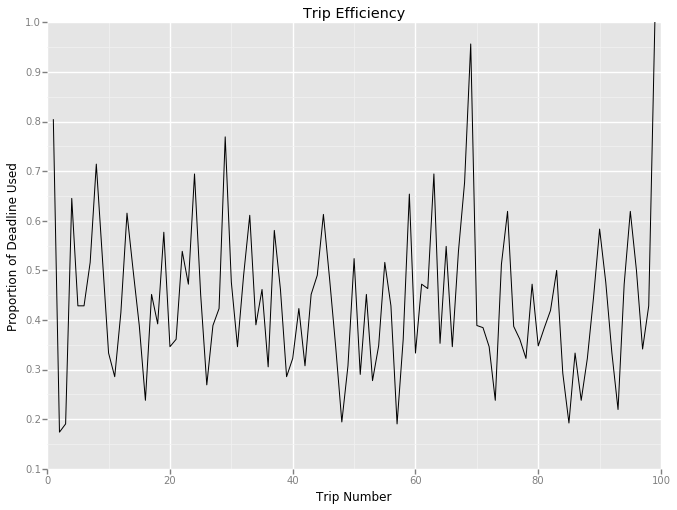

<ggplot: (33764458)>

In [77]:
temp = df.groupby(['trip']).agg({'deadline':'max','light':'count'})
temp['deadline']+=1
temp['UtilizedMoves'] = temp['light']/temp['deadline']
temp = temp.reset_index()
temp
ggplot(temp, aes(x='trip',y='UtilizedMoves')) + geom_line() + ggtitle('Trip Efficiency') + xlab('Trip Number') + ylab('Proportion of Deadline Used')

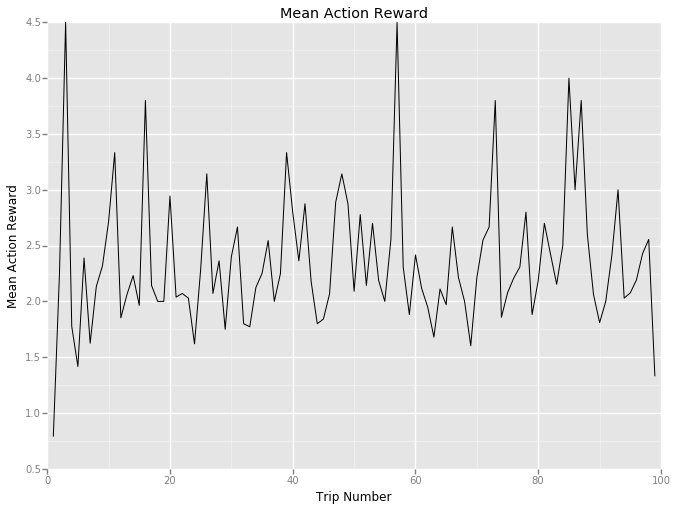

<ggplot: (34487844)>

In [78]:
tempq = df.groupby(['trip'])['reward'].mean().reset_index()
ggplot(tempq, aes(x='trip', y='reward')) + geom_line() + ggtitle('Mean Action Reward') + xlab('Trip Number') + ylab('Mean Action Reward')

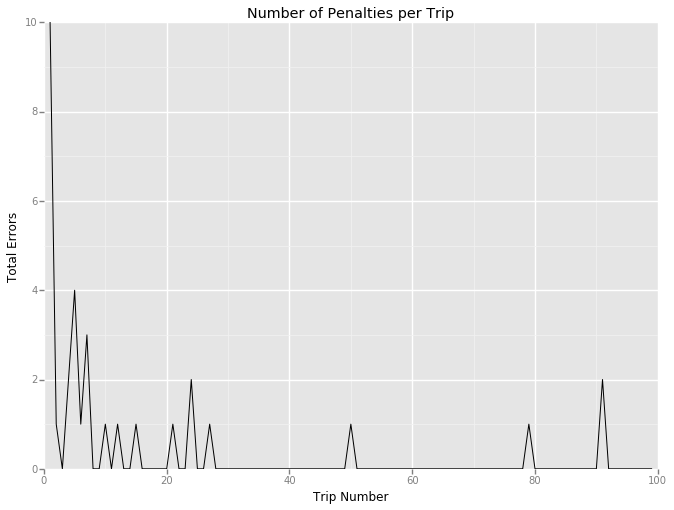

<ggplot: (36200473)>

In [79]:
tempq = df.groupby(['trip'])['Error'].sum().reset_index()
ggplot(tempq, aes(x='trip', y='Error')) + geom_line() + ggtitle('Number of Penalties per Trip') + xlab('Trip Number') + ylab('Total Errors')
